In [1]:
# Importaciones de las librerias necesarias
#%pip install xlrd
#%pip install pandas
#%pip install openpyxl

import pandas as pd

file_path_Datos = r'raw_data\Perfil_Empresas_Imp_2019_Web.xlsx'

file_path = r'raw_data'

columnas_a_leer = ['Cod_Provincia', 'Provincia_Ubicacion', 'Valor_FOB_USD', 'Valor_CIF_USD', 'Capitulo_desc_SA']

#Creación del dataframe con todos los datos

df = pd.read_excel(file_path_Datos, usecols=columnas_a_leer)

#Creación de dataframe sumando todos los costos de importación por provincia 
df_grouped = df.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].sum().reset_index()

df_grouped_sorted_1 = df_grouped.sort_values('Valor_CIF_USD', ascending=False).reset_index()
# Ahora 'Valor_CIF_USD' es una columna en 'df_grouped' y podemos aplicar el formato
#df_grouped['Valor_CIF_USD'] = df_grouped['Valor_CIF_USD'].apply(lambda x: '{:.2f}'.format(x))

# Ahora 'Valor_CIF_USD' es una columna en 'df_grouped' y podemos aplicar el formato
df_grouped_sorted_1['Valor_CIF_USD'] = df_grouped_sorted_1['Valor_CIF_USD'].apply(lambda x: '{:.2f}'.format(x))

df_grouped_sorted_1 = df_grouped_sorted_1.drop(columns=['index'])
print(df_grouped_sorted_1)




       Provincia_Ubicacion  Valor_CIF_USD
0        Distrito Nacional  9320585584.00
1            Santo Domingo  4518787902.38
2            San Cristóbal  3149361599.99
3                 Santiago  2097379629.80
4                La Romana   455405069.83
5            La Altagracia   432508249.05
6     San Pedro de Macorís   355690909.56
7          Sánchez Ramírez   347202154.09
8                Espaillat   327895994.95
9                  La Vega   261228369.97
10         Sin información   255492949.72
11          Monseñor Nouel   239043283.06
12            Puerto Plata    73720980.72
13            Monte Cristi    60148583.35
14                Valverde    52896873.52
15                    Azua    47671570.00
16                  Duarte    42286523.28
17                Barahona    37532901.05
18                 Peravia    29903117.41
19        Hermanas Mirabal    28871691.94
20              Pedernales    15047503.69
21  María Trinidad Sánchez     8191248.84
22             Monte Plata     737

In [12]:

# Conviersión del 'Valor_CIF_USD' a tipo numérico, ignorando errores
df_grouped['Valor_CIF_USD'] = pd.to_numeric(df_grouped['Valor_CIF_USD'], errors='coerce')

# Calculo del costo total de las importaciones
total_costo_importaciones = df_grouped['Valor_CIF_USD'].sum()

# Impresión del costo total de las importaciones en notación normal
print(f"Total Costo Importaciones: {total_costo_importaciones:.2f}")

# Calculo del porcentaje del costo de importación por provincia
df_grouped['Porcentaje'] = (df_grouped['Valor_CIF_USD'] / total_costo_importaciones) * 100

# Ordenamiento del DataFrame por 'Valor_CIF_USD' en orden ascendente
df_grouped_sorted = df_grouped.sort_values('Valor_CIF_USD', ascending=False).reset_index()

# Configuración de la opción de visualización para mostrar el formato float en lugar de notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Impresión del DataFrame para verificar los resultados
print(df_grouped_sorted[['Provincia_Ubicacion', 'Valor_CIF_USD', 'Porcentaje']])


Total Costo Importaciones: 22202271906.73
       Provincia_Ubicacion  Valor_CIF_USD  Porcentaje
4        Distrito Nacional  9320585584.00       41.98
29           Santo Domingo  4518787902.38       20.35
23           San Cristóbal  3149361599.99       14.18
27                Santiago  2097379629.80        9.45
13               La Romana   455405069.83        2.05
12           La Altagracia   432508249.05        1.95
26    San Pedro de Macorís   355690909.56        1.60
31         Sánchez Ramírez   347202154.09        1.56
8                Espaillat   327895994.95        1.48
14                 La Vega   261228369.97        1.18
30         Sin información   255492949.72        1.15
16          Monseñor Nouel   239043283.06        1.08
21            Puerto Plata    73720980.72        0.33
17            Monte Cristi    60148583.35        0.27
32                Valverde    52896873.52        0.24
0                     Azua    47671570.00        0.21
5                   Duarte    42286523.2

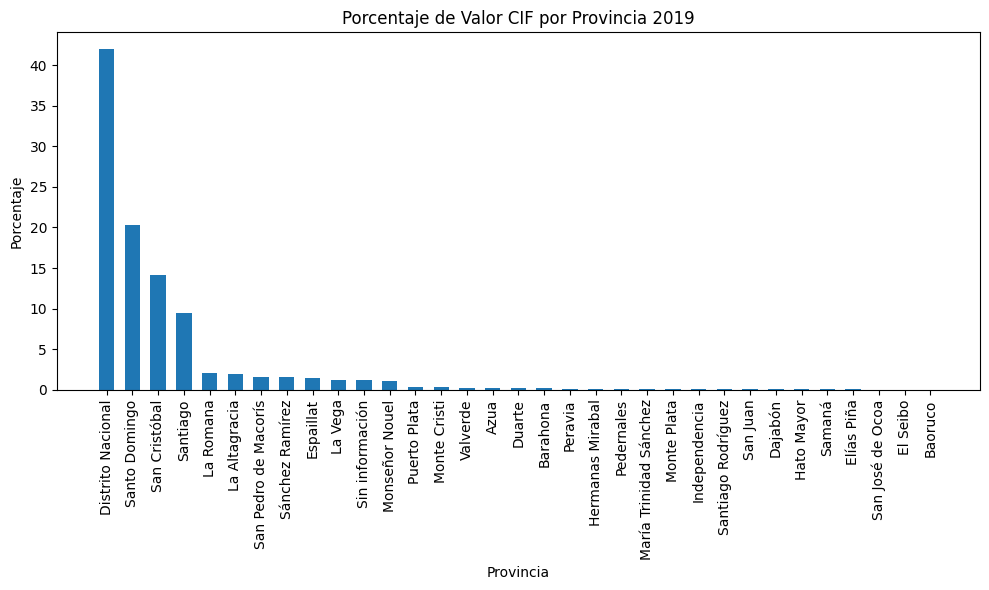

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

# Creación del gráfico de barras con los datos ordenados
plt.bar(df_grouped_sorted['Provincia_Ubicacion'], df_grouped_sorted['Porcentaje'], width=0.6)

# Rotación de los nombres de las etiquetas del eje X a vertical
plt.xticks(rotation=90)

# Personalización del gráfico 
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')
plt.title('Porcentaje de Valor CIF por Provincia 2019')

# for index, row in df_grouped_sorted.iterrows():
#      plt.text(index, row['Porcentaje'], f"{row['Porcentaje']:.2f}%", ha='center', va='bottom')

# creación del gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el gráfico se ajuste al área de dibujo
plt.show()